# Глава 1 (Иванов Илья, группа 3530901/70203)

## Введение

### Сигналы
Модули, которые нам понадобятся:

* `thinkdsp` - python-модуль, написанный автором учебника, и предоставляющий классы и функции для работы с сигналами.

* `thinkplot` - обёртка для некоторых функций в pyplot

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Создадим сигналы в виде синуса и косинуса с помощью функций из thinkdsp

In [2]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

Отобразим созданные сигналы с помощью метода plot(). По умолчанию plot() выводит график трёх периодов

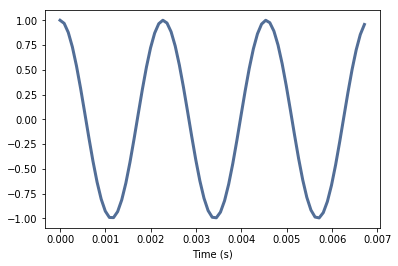

In [3]:
cos_sig.plot()
thinkplot.config(xlabel='Time (s)')

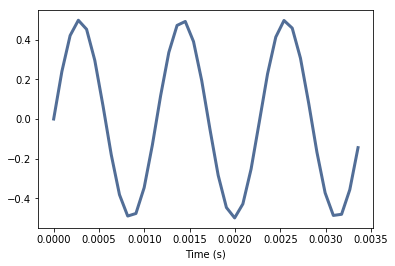

In [4]:
sin_sig.plot()
thinkplot.config(xlabel='Time (s)')

Частота у второго сигнала в 2 раза выше, чем у первого, поэтому его переод в 2 раза меньше

Результатом сложения двух или более сигналов будет SumSignal

In [5]:
mix = sin_sig + cos_sig
mix

### Waves
Wave - это сигнал, обрабатываемый в последовательности моментов времени. Каждый момент времени называется кадром(frame). framerate - число кадров в секунду

In [6]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

IPython предоставляет аудио виджет, с помощью которого мы можем проиграть wave


In [7]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

Кроме того, воспроизвести wave мы можем с помощью метода make_audio()

In [8]:
wave.make_audio()

ys - это массив NymPy, содержащий значения сигнала в определённые моменты времени. Промежутки между соседними моментами времени равны и обратны framerate-у

In [9]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000)

Number of samples 5512
Timestep in ms 0.09070294784580499


Периодические сигналы имеют атрибут `period`.

У wave есть метод `segment()`, который позволяет выделить некоторый сегмент в отдельный wave. Выделим сегмент длиной в 3 периода из нашей волны

In [10]:
period = mix.period
segment = wave.segment(start=0, duration=period*3)
period

0.0022727272727272726

Wave, как и signal, поддерживает plot()

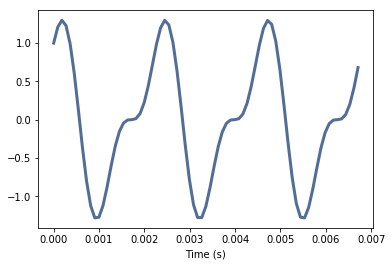

In [11]:
segment.plot()
thinkplot.config(xlabel='Time (s)')

`normalize` приводит значения wave в диапазон от -1 до 1

`apodize` сужает начало и конец волны, чтобы она не "кликала" при воспроизведении

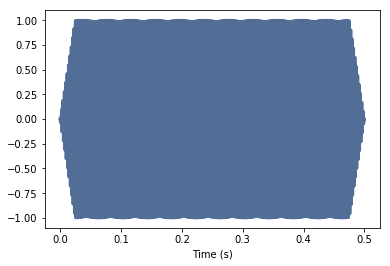

In [12]:
wave.normalize()
wave.apodize()
wave.plot()
thinkplot.config(xlabel='Time (s)')

Wave можно записать в WAV файл, который затем можно воспроизвести в любом медиа-проигрывателе

In [13]:
wave.write('temp.wav')

Writing temp.wav


`read_wave()` считывает WAV файл

In [14]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')

In [15]:
wave.make_audio()

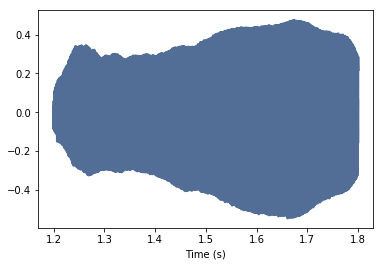

In [16]:
start = 1.2
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

Когда мы выводим график таким образом, линии сливаются друг с другом и мы не видим сам сигнал чётко, однако, мы всё ещё можем оценить изменение его амплитуды.

### Спектры
С помощью метода `make_spectrum()`, который предоставляет wave, можно получить спектр сигнала

In [17]:
spectrum = segment.make_spectrum()

Спектр также можно отобразить с помощью `plot()`

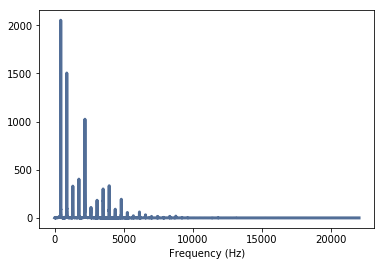

In [18]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

Установим верхнюю границу частоты, чтобы чётче увидеть низкие частоты

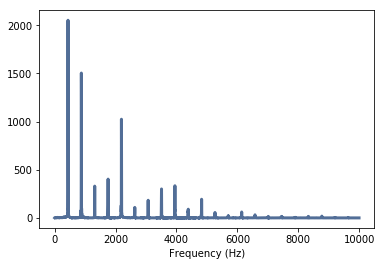

In [19]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')

Spectrum предоставляет 3 метода для изменения спектра: `low_pass()`, `high_pass()` и `band_stop()`

`low_pass()` применяет фильтр нижних частот, то есть ослабляет компоненты выше частоты среза

In [20]:
spectrum.low_pass(3000)

Если не задавать коэффициент, на который будут умножаться все компоненты выше частоты среза, то он будет принят равным нулю.

В результате получаем спектр с меньшим количеством компонент

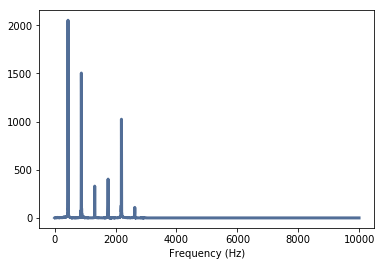

In [21]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')

Изменённый спектр можно превратить обратно в wave

In [22]:
filtered = spectrum.make_wave()

Произведём его нормализацию

In [23]:
filtered.normalize()

Кроме того, используем `apodize()` чтобы избежать "кликов"

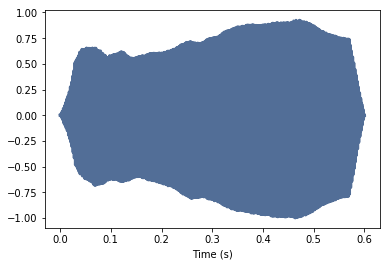

In [24]:
filtered.apodize()
filtered.plot()
thinkplot.config(xlabel='Time (s)')

Проделаем те же действия с исходным сегментом

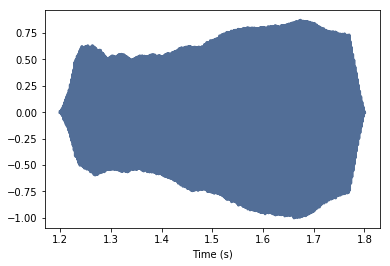

In [25]:
segment.normalize()
segment.apodize()
segment.plot()
thinkplot.config(xlabel='Time (s)')

Прослушаем оригинальный и изменённый сегмент

In [26]:
segment.make_audio()

In [27]:
filtered.make_audio()

Оригинальный сегмент звучит более сложно и целостно, в то время как отфильтрованная версия звучит больше как чистый тон с приглушенным качеством.

## Упражнение 1.1.

Run the code in the following cells to create a Signal with two frequency components, and then create a Wave that contains a half-second sample from the Signal.

Add code to compute and plot the Spectrum of this Wave.

Then add another Signal to the mix, recompute the Wave and look at the Spectrum.

In [28]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Создадим сигнал из двух компонент с разными частотами:

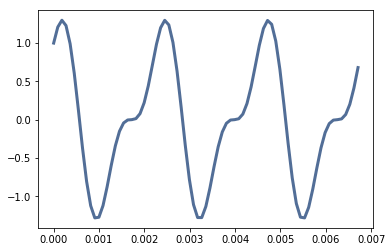

In [29]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
mix = cos_sig + sin_sig
mix.plot()

Создадим волну, содержащую полусекундный отрезок сигнала

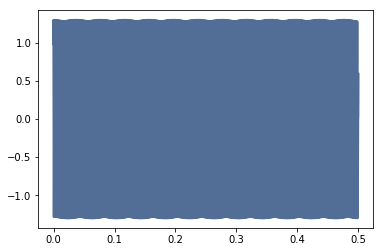

In [30]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.plot()

С помощью метода `make_spectrum()` получим спектр сигнала, после чего отобразим его

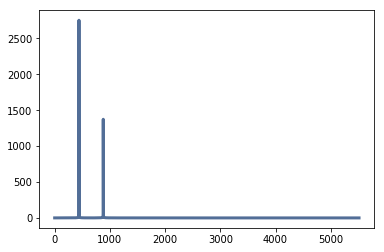

In [31]:
spectrum = wave.make_spectrum()
spectrum.plot()

Ожидаемо получаем две частоты в спектре(440 и 880 Герц) с отличающимися вдвое амплитудами.

Создадим ещё один сигнал, добавим его к сумме и повторим исследование

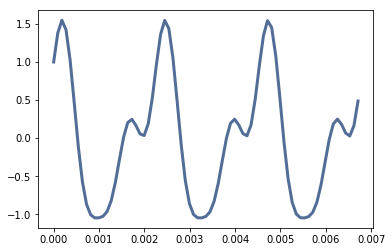

In [32]:
sin_sig_2 = thinkdsp.SinSignal(freq=1320, amp=0.25, offset=0)
mix = mix + sin_sig_2
mix.plot()

Создадим волну, содержащую полусекундный отрезок сигнала

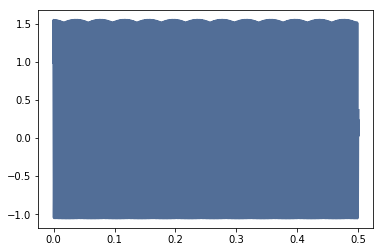

In [33]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.plot()

С помощью метода make_spectrum() получим спектр сигнала, после чего отобразим его

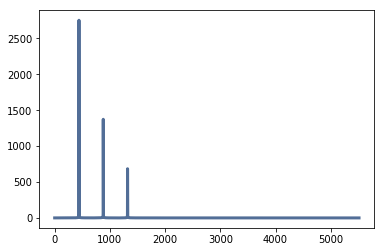

In [34]:
spectrum = wave.make_spectrum()
spectrum.plot()

В спектре появилась третья частота (1320 Гц) с заданной амплитудой (1/4 от максимальной)

## Упражнение 1.2.

Go to http://freesound.org and download a sound samplethat includes music, speech, or other sounds that have a well-defined pitch.Select a roughly half-second segment where the pitch is constant. Computeand plot the spectrum of the segment you selected.  What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to filter out some of the harmonics.  Then convert the spectrum back to a wave and listen to it.  How does the sound relate to the changes you made in the spectrum?

In [35]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Я выбрал звуки монастыря (https://freesound.org/people/code_box/sounds/505260/)

Создадим wave из скачанного wav файла, после чего нормализуем его и прослушаем

In [36]:
wave_2 = thinkdsp.read_wave('505260__code-box__solemn-monk.wav')
wave_2.normalize()
wave_2.make_audio()

Выведем график wave

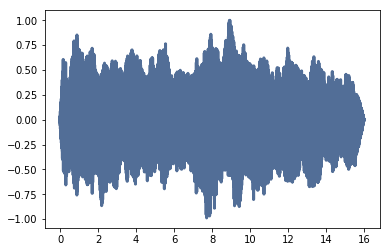

In [37]:
wave_2.plot()

Выделим полусекундный сегмент из wave

In [38]:
segment_2 = wave_2.segment(start=4.0, duration=0.5)
segment_2.make_audio()

Выведем график выделенного сегмента

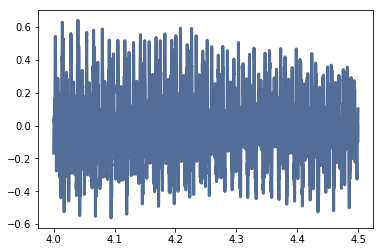

In [39]:
segment_2.plot()

Выделим ещё более короткий сегмент, чтобы чётко увидеть сам сигнал

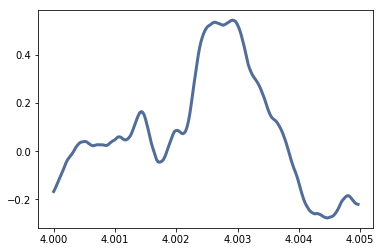

In [40]:
segment_2.segment(start=4, duration=0.005).plot()

С помощью метода `make_spectrum()` получим спектр сигнала и отобразим его

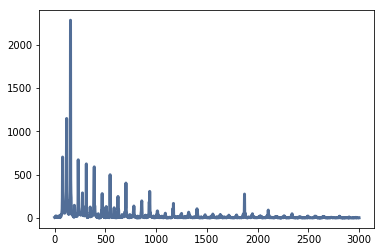

In [41]:
spectrum_2 = segment_2.make_spectrum()
spectrum_2.plot(high=3000)

Спектр содержит большое кол-во частот. Выделим область, которая содержит основную (наименьшую) и доминирующую (с наибольшей амплитудой) частоты

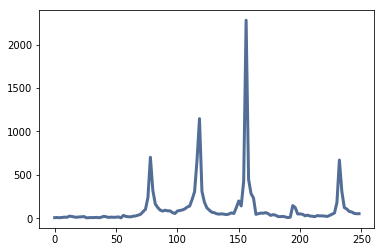

In [42]:
spectrum_2.plot(high=250)

С помощью `peaks()` можно вывести максимумы спектра, отсортированные по убыванию амплитуды

In [43]:
spectrum_2.peaks()[:20]

[(2279.807492394817, 156.0),
 (1146.7324034515068, 118.0),
 (702.0174070870587, 78.0),
 (670.0939092975597, 232.0),
 (669.2436012484485, 116.0),
 (622.7555923360745, 312.0),
 (588.7527342881617, 390.0),
 (497.85468114667395, 546.0),
 (465.21905453949023, 388.0),
 (448.3673032592091, 158.0),
 (423.4719548182161, 154.0),
 (401.9259701342945, 702.0),
 (318.45165448228545, 80.0),
 (310.42069298021835, 120.0),
 (307.67043181285203, 234.0),
 (305.93392361446945, 936.0),
 (305.62815658537784, 114.0),
 (288.3675693908853, 274.0),
 (283.5198505012983, 160.0),
 (280.1481302305548, 468.0)]

Доминирующая частота - 156 Гц. Основной частотой вероятно является 78 Гц, что соответствует D#2(РЕ диез второй октавы)

Отфильтруем высокие частоты

In [44]:
spectrum_2.low_pass(1000)

Преобразуем спектр обратно в wave и прослушаем

In [45]:
spectrum_2.make_wave().make_audio()

Нефильтрованный сегмент звучит более сложно и целостно, в то время как отфильтрованная версия звучит больше как чистый тон с приглушенным качеством.

## Упражнение 1.3.

Synthesize  a  compound  signal  by  creating  SinSignal  and CosSignal objects and adding them up.  Evaluate the signal to get a Wave, and listen to it. Compute its Spectrum and plot it. What happens if you add frequency components that are not multiples of the fundamental?

In [46]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

Создадим сигнал из четырёх компонент(2 компоненты создадим с помощью SinSignal и 2 с  помощью CosSignal)

In [47]:
signal_3 = (thinkdsp.SinSignal(freq=80, amp=1.0) +
          thinkdsp.CosSignal(freq=160, amp=0.25) +
          thinkdsp.SinSignal(freq=320, amp=0.5) +
          thinkdsp.CosSignal(freq=400, amp=0.1))

Получившийся сигнал

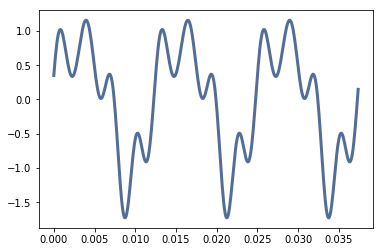

In [48]:
signal_3.plot()

Преобразуем сигнал в wave длиной 3 секунды

In [49]:
wave_3 = signal_3.make_wave(duration=3)

Получившийся звук

In [50]:
wave_3.make_audio()

Все компоненты кратны 80 Гц, поэтому звук получился весьма гармоничным

Получим спектр сигнала

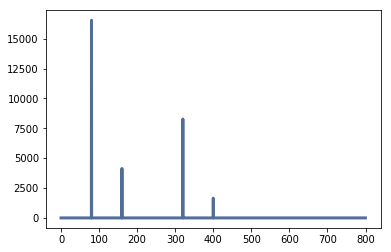

In [51]:
spectrum_3 = wave_3.make_spectrum()
spectrum_3.plot(high=800)

Ожидаемо получаем четыре частоты в спектре(80, 160, 320 и 400 Герц) с заданными отношениями амплитуд.

Если добавить компоненту с частотой, не кратной 80 Гц, будет слышен дисснонанс

In [52]:
signal_3 += thinkdsp.SinSignal(freq=370)
signal_3.make_wave().make_audio()

## Упражнение 1.4.

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`. Hint: it should only take two lines of code.

Cоздадим wave из файла, скачанного с freesound.org

In [53]:
wave_4 = thinkdsp.read_wave('505260__code-box__solemn-monk.wav')
wave_4.normalize()
wave_4.make_audio()

In [54]:
def stretch(wave, stretch):
    wave.ts *= stretch
    wave.framerate /= stretch

Ускорим скачанный отрывок в 2 раза

In [55]:
stretch(wave_4, 0.5)
wave_4.make_audio()

График

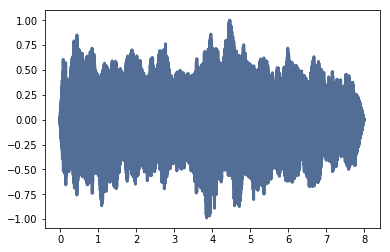

In [56]:
wave_4.plot()

Замедлим ускоренную версию в 4 раза. Тем самым получим замедленную в 2 раза версию исходного отрывка.

In [57]:
stretch(wave_4, 4)
wave_4.make_audio()

График

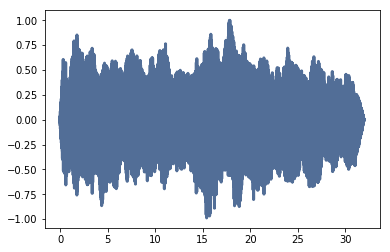

In [58]:
wave_4.plot()

## Вывод

В ходе выполнения данной работы были получены базовые навыки создания и обработки синалов, изчучены методы для графического отображения сигналов, а также методы для работы со спектром.